# Theme of this notebook - application to real world data (coffee_chain_margin_analysis)

* This notebook try to build a regression model to predict westcoast coffee chains' margins
* Tried to use the interaction term (=a term allowing us to analyze whether the relationship between the dependent and the independent variable changes depending on the value of another independent variable).
* The data of coffee chain was downloaded at the following website. (Of course, all information is publicly available) <br>
https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset
* This dataset contains the following fields.
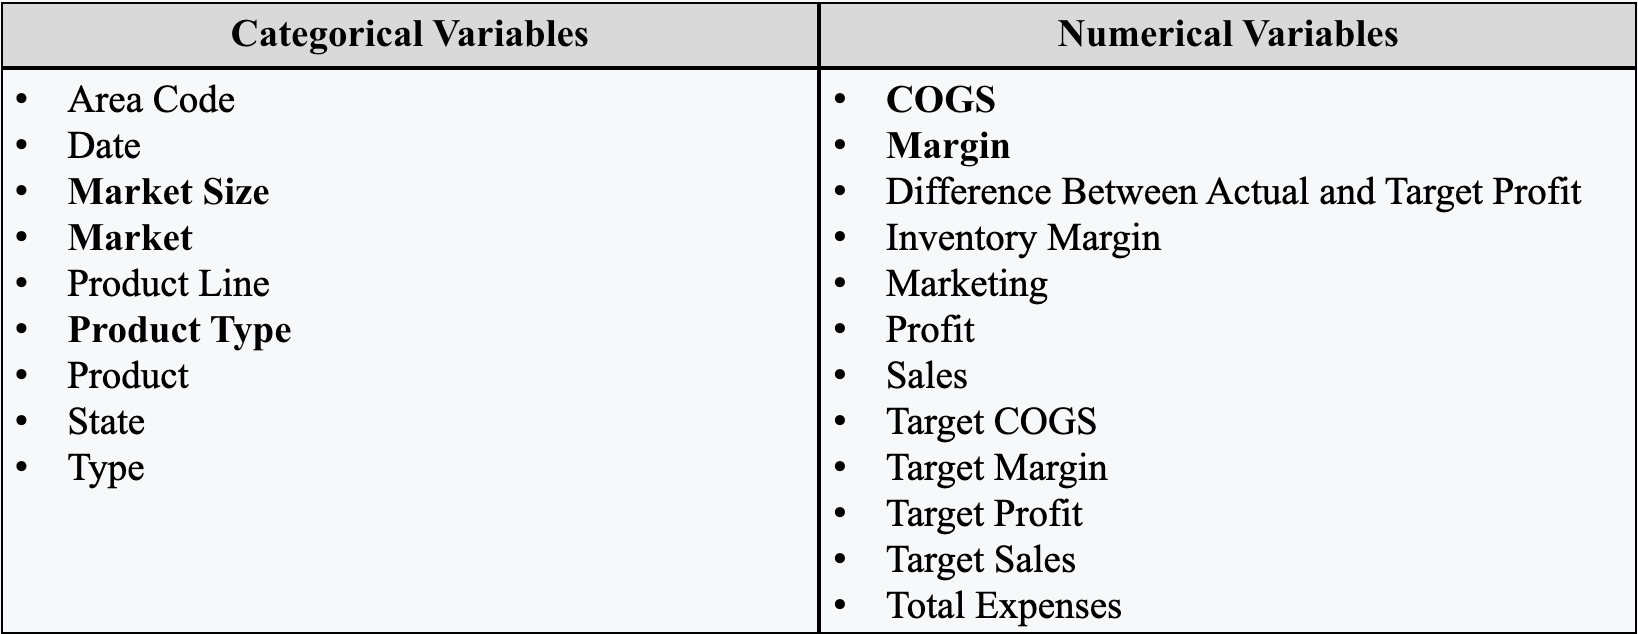

# Load the data

In [64]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("stat-011_Coffee_Chain_Sales.csv")

df.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular


# Check the correlation matrix

<ipython-input-65-68fa28c3c36c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues',square=True)


<Axes: >

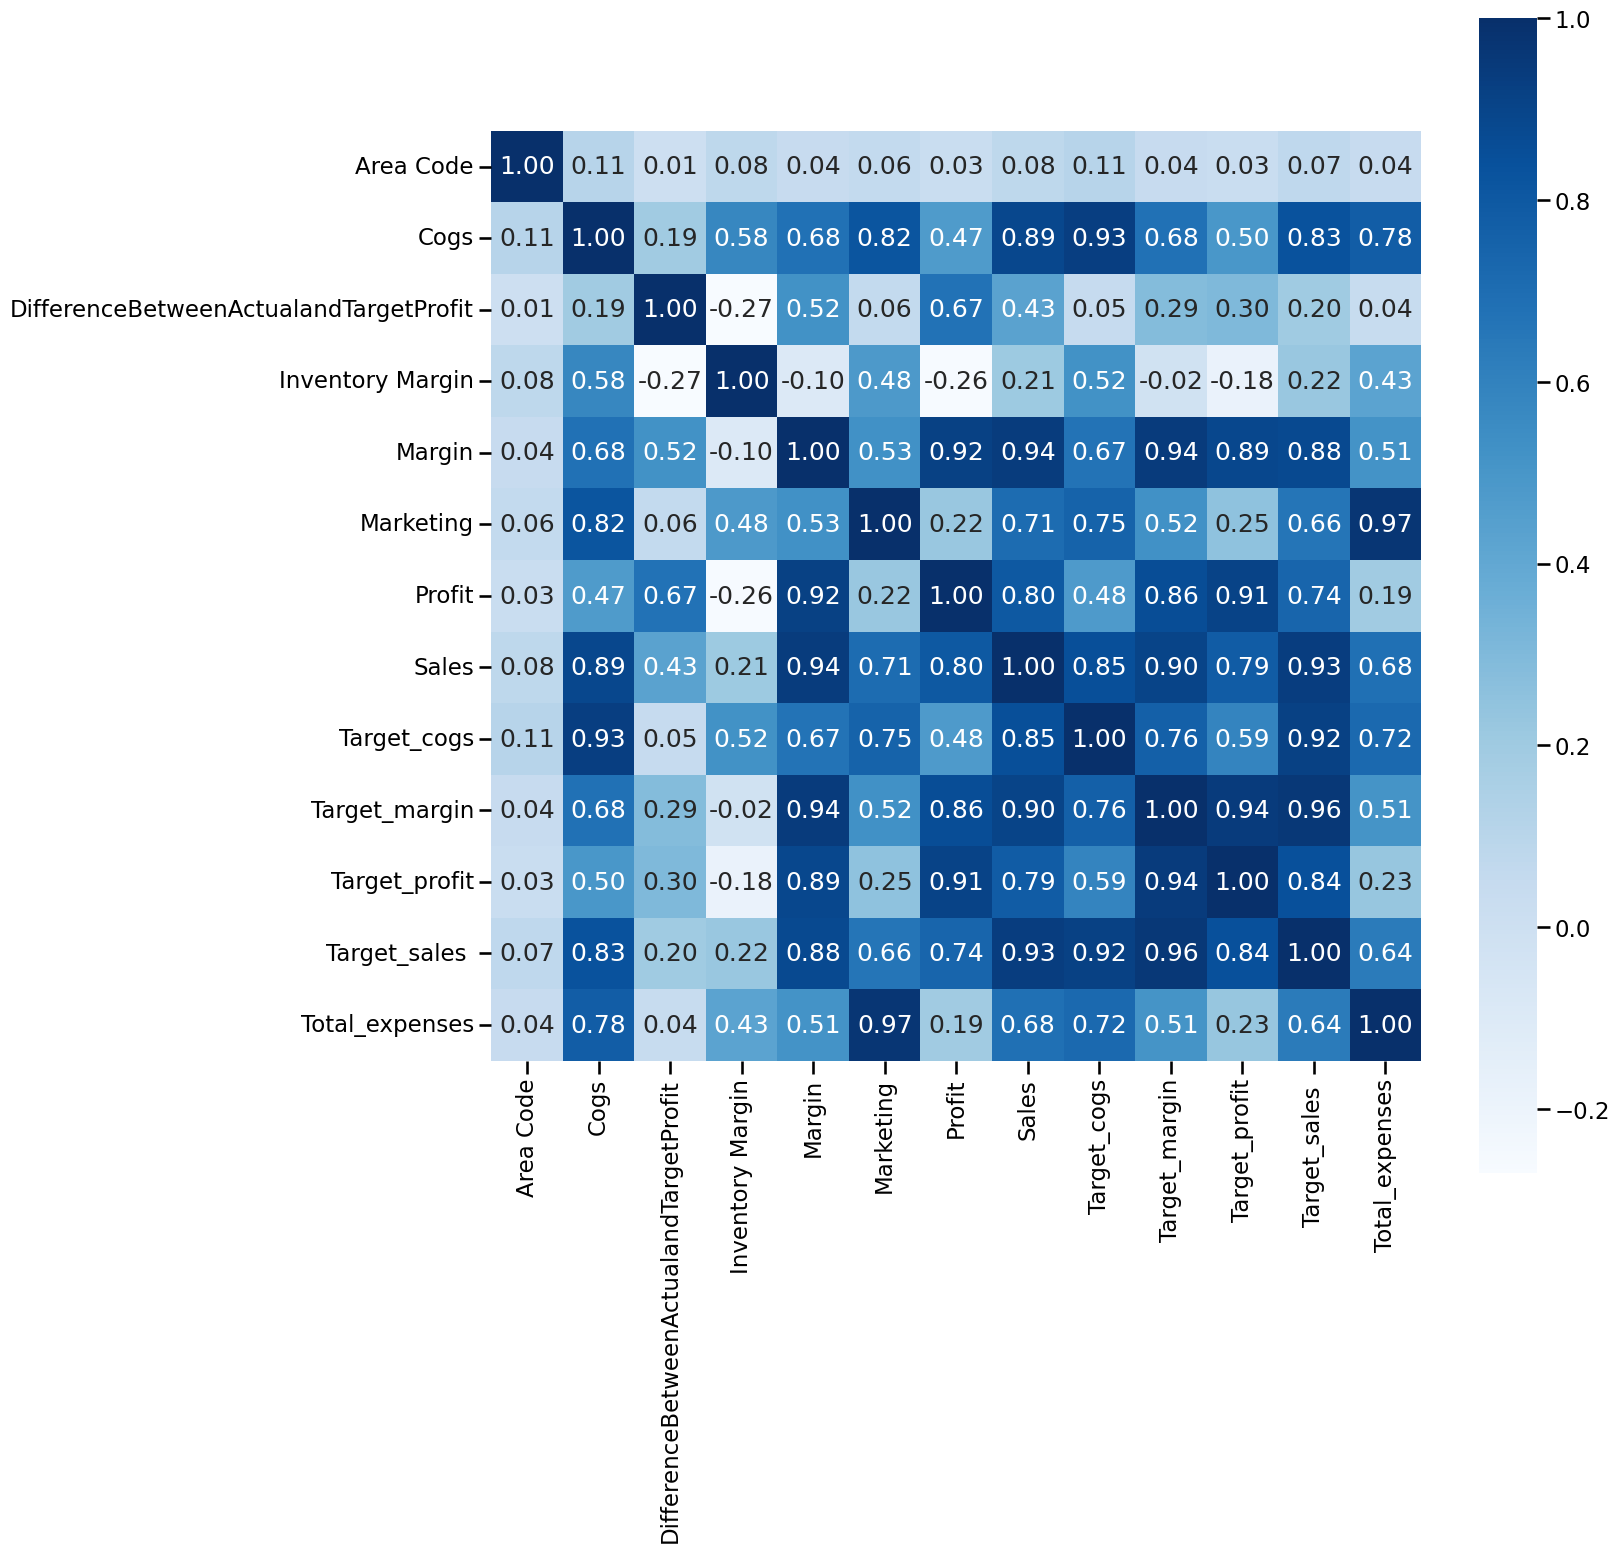

In [65]:
sns.set_context("talk")
fig = plt.subplots(figsize=(15,15))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues',square=True)

# 1. Only focus on the relationship between marketing cost vs margin

In [66]:
# only focus on marketing cost vs margin
marketing = df['Marketing']
margin = df['Margin']
model = sm.OLS(margin,marketing)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Margin   R-squared (uncentered):                   0.633
Model:                            OLS   Adj. R-squared (uncentered):              0.633
Method:                 Least Squares   F-statistic:                              1831.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                   2.93e-233
Time:                        05:03:34   Log-Likelihood:                         -6200.8
No. Observations:                1062   AIC:                                  1.240e+04
Df Residuals:                    1061   BIC:                                  1.241e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Marketing      2.7290      0.064     42.790      0.000       2.604       2.854
==============================================================================
Omnibus:                      659.624   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14973.094
Skew:                          -2.437   Prob(JB):                         0.00
Kurtosis:                      20.738   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# add constant term
marketing = df['Marketing']
margin = df['Margin']
marketing_addconstant = sm.add_constant(marketing)
model = sm.OLS(margin,marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     408.0
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           5.25e-77
Time:                        05:03:34   Log-Likelihood:                -6127.4
No. Observations:                1062   AIC:                         1.226e+04
Df Residuals:                    1060   BIC:                         1.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0155      3.670     12.537      0.000      38.814      53.217
Marketing      1.8535      0.092     20.198      0.000       1.673       2.034
==============================================================================
Omnibus:                      383.637   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8125.843
Skew:                          -1.133   Prob(JB):                         0.00
Kurtosis:                      16.360   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Divide data into a region level

In [68]:
# First, divide dataset into a region level
#central = df[df['Market']=='Central']
#east = df[df['Market']=='East']
#south = df[df['Market']=='South']
west = df[df['Market']=='West']
west.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
8,775,31,-43,10/8/2012,1000,37,Small Market,West,9,Beans,...,Decaf Irish Cream,7,68,Nevada,30,60,50,90,30,Decaf
9,435,40,-23,10/9/2012,881,59,Small Market,West,11,Beans,...,Decaf Espresso,37,99,Utah,20,60,60,80,22,Decaf
14,775,34,-32,10/14/2012,240,43,Small Market,West,12,Beans,...,Colombian,-2,77,Nevada,40,60,30,100,45,Regular
15,503,54,-28,10/15/2012,404,66,Small Market,West,20,Beans,...,Caffe Latte,12,120,Oregon,40,60,40,100,54,Regular


In [69]:
# Second, check the relationship between marketing cost vs margin in each region
# West region
west_marketing = west['Marketing']
west_margin = west['Margin']
west_marketing_addconstant = sm.add_constant(west_marketing)
model = sm.OLS(west_margin,west_marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     79.52
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           3.19e-17
Time:                        05:03:34   Log-Likelihood:                -1985.1
No. Observations:                 336   AIC:                             3974.
Df Residuals:                     334   BIC:                             3982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1050      7.517      6.799      0.000      36.318      65.892
Marketing      1.4913      0.167      8.917      0.000       1.162       1.820
==============================================================================
Omnibus:                      196.998   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2305.016
Skew:                          -2.201   Prob(JB):                         0.00
Kurtosis:                      15.052   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# East region
# east_marketing = east['Marketing']
# east_margin = east['Margin']
# east_marketing_addconstant = sm.add_constant(east_marketing)
# model = sm.OLS(east_margin,east_marketing_addconstant)
# result = model.fit()
# result.summary()

In [71]:
# Central region
# cen_marketing = central['Marketing']
# cen_margin = central['Margin']
# cen_marketing_addconstant = sm.add_constant(cen_marketing)
# model = sm.OLS(cen_margin,cen_marketing_addconstant)
# result = model.fit()
# result.summary()

In [72]:
# #South region
# sou_marketing = south['Marketing']
# sou_margin = south['Margin']
# sou_marketing_addconstant = sm.add_constant(sou_marketing)
# model = sm.OLS(sou_margin,sou_marketing_addconstant)
# result = model.fit()
# result.summary()

# 3. Integrate market size factor into the model


# First, set dummy variables
By using "get_dummies" method, we can set dummy variables like the following table

In [73]:
west_plus_market_size = pd.get_dummies(west[['Marketing','Margin','Market_size']])
west_plus_market_size

,Marketing,Margin,Market_size_Major Market,Market_size_Small Market
4,23,110,1,0
8,9,37,0,1
9,11,59,0,1
14,12,43,0,1
15,20,66,0,1
...,...,...,...,...
1057,70,251,0,1
1058,29,133,0,1
1059,111,-294,0,1
1060,41,186,0,1


In [74]:
# east_plus_market_size = pd.get_dummies(east[['Marketing','Margin','Market_size']])
# cen_plus_market_size = pd.get_dummies(central[['Marketing','Margin','Market_size']])
# sou_plus_market_size = pd.get_dummies(south[['Marketing','Margin','Market_size']])

# Second, integrate market size factors into the model

In [75]:
# West region
mod_west_marketing = west_plus_market_size[['Marketing','Market_size_Major Market']]
mod_west_margin = west_plus_market_size['Margin']
mod_west_marketing_addconstant = sm.add_constant(mod_west_marketing)
model = sm.OLS(mod_west_margin,mod_west_marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     47.37
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           7.85e-19
Time:                        05:03:39   Log-Likelihood:                -1978.9
No. Observations:                 336   AIC:                             3964.
Df Residuals:                     333   BIC:                             3975.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       48.7542      7.421      6.570      0.000      34.157      63.352
Marketing                    1.2861      0.174      7.375      0.000       0.943       1.629
Market_size_Major Market    43.7498     12.380      3.534      0.000      19.397      68.102
==============================================================================
Omnibus:                      188.148   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1845.988
Skew:                          -2.138   Prob(JB):                         0.00
Kurtosis:                      13.657   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# east region
# mod_east_marketing = east_plus_market_size[['Marketing','Market_size_Major Market']]
# mod_east_margin = east_plus_market_size['Margin']
# mod_east_marketing_addconstant = sm.add_constant(mod_east_marketing)
# model = sm.OLS(mod_east_margin,mod_east_marketing_addconstant)
# result = model.fit()
# result.summary()

In [77]:
# central region
# mod_cen_marketing = cen_plus_market_size[['Marketing','Market_size_Major Market']]
# mod_cen_margin = cen_plus_market_size['Margin']
# mod_cen_marketing_addconstant = sm.add_constant(mod_cen_marketing)
# model = sm.OLS(mod_cen_margin,mod_cen_marketing_addconstant)
# result = model.fit()
# result.summary()

In [78]:
# south region
# mod_sou_marketing = sou_plus_market_size[['Marketing','Market_size_Major Market']]
# mod_sou_margin = sou_plus_market_size['Margin']
# mod_sou_marketing_addconstant = sm.add_constant(mod_sou_marketing)
# model = sm.OLS(mod_sou_margin,mod_sou_marketing_addconstant)
# result = model.fit()
# result.summary()

# 4. Introduce a interaction term into the model

* Definition of the interaction term =  Marketing cost * Market size

In [79]:
# West region
# first, create a interaction term
west_plus_market_size['markting_cost*market_size'] = west_plus_market_size['Marketing'] * west_plus_market_size['Market_size_Major Market']

# Second, put a interaction term into the model
mod2_west_marketing = west_plus_market_size[['Marketing','Market_size_Major Market','markting_cost*market_size']]
mod2_west_margin = west_plus_market_size['Margin']
mod2_west_marketing_addconstant = sm.add_constant(mod2_west_marketing)
model = sm.OLS(mod2_west_margin,mod2_west_marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     38.01
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           3.86e-21
Time:                        05:03:44   Log-Likelihood:                -1971.3
No. Observations:                 336   AIC:                             3951.
Df Residuals:                     332   BIC:                             3966.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        60.9775      7.913      7.706      0.000      45.411      76.544
Marketing                     0.8670      0.202      4.298      0.000       0.470       1.264
Market_size_Major Market    -24.4428     21.267     -1.149      0.251     -66.277      17.392
markting_cost*market_size     1.4790      0.379      3.903      0.000       0.734       2.224
==============================================================================
Omnibus:                      165.914   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.227
Skew:                          -1.899   Prob(JB):                    1.12e-280
Kurtosis:                      11.813   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# # east region
# # first, create a interaction term
# east_plus_market_size['markting_cost*market_size'] = east_plus_market_size['Marketing'] * east_plus_market_size['Market_size_Major Market']

# # Second, put a interaction term into the model
# mod2_east_marketing = east_plus_market_size[['Marketing','Market_size_Major Market','markting_cost*market_size']]
# mod2_east_margin = east_plus_market_size['Margin']
# mod2_east_marketing_addconstant = sm.add_constant(mod2_east_marketing)
# model = sm.OLS(mod2_east_margin,mod2_east_marketing_addconstant)
# result = model.fit()
# result.summary()

In [81]:
# # central region
# # first, create a interaction term
# cen_plus_market_size['markting_cost*market_size'] = cen_plus_market_size['Marketing'] * cen_plus_market_size['Market_size_Major Market']

# # Second, put a interaction term into the model
# mod2_cen_marketing = cen_plus_market_size[['Marketing','Market_size_Major Market','markting_cost*market_size']]
# mod2_cen_margin = cen_plus_market_size['Margin']
# mod2_cen_marketing_addconstant = sm.add_constant(mod2_cen_marketing)
# model = sm.OLS(mod2_cen_margin,mod2_cen_marketing_addconstant)
# result = model.fit()
# result.summary()

In [82]:
# # south region
# # first, create a interaction term
# sou_plus_market_size['markting_cost*market_size'] = sou_plus_market_size['Marketing'] * sou_plus_market_size['Market_size_Major Market']

# # Second, put a interaction term into the model
# mod2_sou_marketing = sou_plus_market_size[['Marketing','Market_size_Major Market','markting_cost*market_size']]
# mod2_sou_margin = sou_plus_market_size['Margin']
# mod2_sou_marketing_addconstant = sm.add_constant(mod2_sou_marketing)
# model = sm.OLS(mod2_sou_margin,mod2_sou_marketing_addconstant)
# result = model.fit()
# result.summary()

# 5. Put some control variables

In [83]:
# Back to the beginning, devide dataset into a region level
# central = df[df['Market']=='Central']
# east = df[df['Market']=='East']
# south = df[df['Market']=='South']
west = df[df['Market']=='West']
west

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
8,775,31,-43,10/8/2012,1000,37,Small Market,West,9,Beans,...,Decaf Irish Cream,7,68,Nevada,30,60,50,90,30,Decaf
9,435,40,-23,10/9/2012,881,59,Small Market,West,11,Beans,...,Decaf Espresso,37,99,Utah,20,60,60,80,22,Decaf
14,775,34,-32,10/14/2012,240,43,Small Market,West,12,Beans,...,Colombian,-2,77,Nevada,40,60,30,100,45,Regular
15,503,54,-28,10/15/2012,404,66,Small Market,West,20,Beans,...,Caffe Latte,12,120,Oregon,40,60,40,100,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


# 5-a. Put product_line as another variable

In [84]:
# First, set dummy variables
west_plus_product_line = pd.get_dummies(west[['Marketing','Margin','Product_line']])
west_plus_product_line

,Marketing,Margin,Product_line_Beans,Product_line_Leaves
4,23,110,0,1
8,9,37,1,0
9,11,59,1,0
14,12,43,1,0
15,20,66,1,0
...,...,...,...,...
1057,70,251,0,1
1058,29,133,0,1
1059,111,-294,0,1
1060,41,186,0,1


In [85]:
# east_plus_product_line = pd.get_dummies(east[['Marketing','Margin','Product_line']])
# cen_plus_product_line = pd.get_dummies(central[['Marketing','Margin','Product_line']])
# sou_plus_product_line = pd.get_dummies(south[['Marketing','Margin','Product_line']])

In [37]:
# Second, integrate product line factors into the model

# West region
pro_west_marketing = west_plus_product_line[['Marketing','Product_line_Beans']]
pro_west_margin = west_plus_product_line['Margin']
pro_west_marketing_addconstant = sm.add_constant(pro_west_marketing)
model = sm.OLS(pro_west_margin,pro_west_marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     39.99
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.72e-16
Time:                        04:44:25   Log-Likelihood:                -1984.8
No. Observations:                 336   AIC:                             3976.
Df Residuals:                     333   BIC:                             3987.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 54.9890      9.118      6.031      0.000      37.053      72.925
Marketing              1.4853      0.168      8.866      0.000       1.156       1.815
Product_line_Beans    -7.3563      9.761     -0.754      0.452     -26.556      11.844
==============================================================================
Omnibus:                      201.171   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2466.665
Skew:                          -2.247   Prob(JB):                         0.00
Kurtosis:                      15.490   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obviously, the p-value of Product_line_Beans is so high compared to the threshold(α = 0.05).<br>
Therefore, we can conclude that product line does not improve the model.(= it does not affect the margin from a statistics viewpoint)

In [38]:
# # east region
# pro_east_marketing = east_plus_product_line[['Marketing','Product_line_Beans']]
# pro_east_margin = east_plus_product_line['Margin']
# pro_east_marketing_addconstant = sm.add_constant(pro_east_marketing)
# model = sm.OLS(pro_east_margin,pro_east_marketing_addconstant)
# result = model.fit()
# result.summary()

In [39]:
# # central region
# pro_cen_marketing = cen_plus_product_line[['Marketing','Product_line_Beans']]
# pro_cen_margin = cen_plus_product_line['Margin']
# pro_cen_marketing_addconstant = sm.add_constant(pro_cen_marketing)
# model = sm.OLS(pro_cen_margin,pro_cen_marketing_addconstant)
# result = model.fit()
# result.summary()

In [40]:
# # south region
# pro_sou_marketing = sou_plus_product_line[['Marketing','Product_line_Beans']]
# pro_sou_margin = sou_plus_product_line['Margin']
# pro_sou_marketing_addconstant = sm.add_constant(pro_sou_marketing)
# model = sm.OLS(pro_sou_margin,pro_sou_marketing_addconstant)
# result = model.fit()
# result.summary()

# 5-b. Put type as another variable

In [41]:
# First, set dummy variables
west_plus_type = pd.get_dummies(west[['Marketing','Margin','Type']])

In [86]:
# east_plus_type = pd.get_dummies(east[['Marketing','Margin','Type']])
# cen_plus_type = pd.get_dummies(central[['Marketing','Margin','Type']])
# sou_plus_type = pd.get_dummies(south[['Marketing','Margin','Type']])

In [87]:
# Second, integrate typw factors into the model

# West region
typ_west_marketing = west_plus_type[['Marketing','Type_Regular']]
typ_west_margin = west_plus_type['Margin']
typ_west_marketing_addconstant = sm.add_constant(typ_west_marketing)
model = sm.OLS(typ_west_margin,typ_west_marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     41.41
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           8.73e-17
Time:                        05:04:11   Log-Likelihood:                -1983.6
No. Observations:                 336   AIC:                             3973.
Df Residuals:                     333   BIC:                             3985.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           61.5234      9.710      6.336      0.000      42.423      80.624
Marketing        1.4744      0.167      8.825      0.000       1.146       1.803
Type_Regular   -16.7000      9.893     -1.688      0.092     -36.160       2.760
==============================================================================
Omnibus:                      189.040   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2099.585
Skew:                          -2.101   Prob(JB):                         0.00
Kurtosis:                      14.503   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obviously, the p-value of Type_Regular is so high compared to the threshold(α = 0.05).
Therefore, we can conclude that type does not improve the model.(= it does not affect the margin from a statistics viewpoint)

In [88]:
# # east region
# typ_east_marketing = east_plus_type[['Marketing','Type_Regular']]
# typ_east_margin = east_plus_type['Margin']
# typ_east_marketing_addconstant = sm.add_constant(typ_east_marketing)
# model = sm.OLS(typ_east_margin,typ_east_marketing_addconstant)
# result = model.fit()
# result.summary()

In [89]:
# # central region
# typ_cen_marketing = cen_plus_type[['Marketing','Type_Regular']]
# typ_cen_margin = cen_plus_type['Margin']
# typ_cen_marketing_addconstant = sm.add_constant(typ_cen_marketing)
# model = sm.OLS(typ_cen_margin,typ_cen_marketing_addconstant)
# result = model.fit()
# result.summary()

In [90]:
# # south region
# typ_sou_marketing = sou_plus_type[['Marketing','Type_Regular']]
# typ_sou_margin = sou_plus_type['Margin']
# typ_sou_marketing_addconstant = sm.add_constant(typ_sou_marketing)
# model = sm.OLS(typ_sou_margin,typ_sou_marketing_addconstant)
# result = model.fit()
# result.summary()

# 5-c. Put cogs+productline+marketing_size+interaction term as other variables

In [91]:
# First, set dummy variables
west_plus_all = pd.get_dummies(west[['Marketing','Margin','Market_size','Cogs','Product_line']])
west_plus_all

,Marketing,Margin,Cogs,Market_size_Major Market,Market_size_Small Market,Product_line_Beans,Product_line_Leaves
4,23,110,72,1,0,0,1
8,9,37,31,0,1,1,0
9,11,59,40,0,1,1,0
14,12,43,34,0,1,1,0
15,20,66,54,0,1,1,0
...,...,...,...,...,...,...,...
1057,70,251,250,0,1,0,1
1058,29,133,88,0,1,0,1
1059,111,-294,294,0,1,0,1
1060,41,186,134,0,1,0,1


In [92]:
# east_plus_all = pd.get_dummies(east[['Marketing','Margin','Market_size','Cogs','Product_line']])
# cen_plus_all = pd.get_dummies(central[['Marketing','Margin','Market_size','Cogs','Product_line']])
# sou_plus_all = pd.get_dummies(south[['Marketing','Margin','Market_size','Cogs','Product_line']])

In [93]:
# West region
# second, create a interaction term
west_plus_all['markting_cost*market_size'] = west_plus_all['Marketing'] * west_plus_all['Market_size_Major Market']

# Third, integrate marketing,market_size,cogs,product_line factors into the model
all_west_marketing = west_plus_all[['Marketing','Cogs','Product_line_Beans','Market_size_Major Market','markting_cost*market_size']]
all_west_margin = west_plus_type['Margin']
all_west_marketing_addconstant = sm.add_constant(all_west_marketing)
model = sm.OLS(all_west_margin,all_west_marketing_addconstant)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     33.09
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.40e-27
Time:                        05:04:11   Log-Likelihood:                -1952.7
No. Observations:                 336   AIC:                             3917.
Df Residuals:                     330   BIC:                             3940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        62.3564     10.421      5.984      0.000      41.857      82.856
Marketing                    -0.4070      0.283     -1.436      0.152      -0.964       0.151
Cogs                          0.6210      0.112      5.534      0.000       0.400       0.842
Product_line_Beans          -22.7123      9.845     -2.307      0.022     -42.079      -3.345
Market_size_Major Market    -61.4534     21.672     -2.836      0.005    -104.086     -18.821
markting_cost*market_size     1.8873      0.395      4.772      0.000       1.109       2.665
==============================================================================
Omnibus:                      268.482   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4277.801
Skew:                          -3.278   Prob(JB):                         0.00
Kurtosis:                      19.204   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# # East region
# # second, create a interaction term
# east_plus_all['markting_cost*market_size'] = east_plus_all['Marketing'] * east_plus_all['Market_size_Major Market']

# # Third, integrate marketing,market_size,cogs,product_line factors into the model
# all_east_marketing = east_plus_all[['Marketing','Cogs','Product_line_Beans','Market_size_Major Market','markting_cost*market_size']]
# all_east_margin = east_plus_type['Margin']
# all_east_marketing_addconstant = sm.add_constant(all_east_marketing)
# model = sm.OLS(all_east_margin,all_east_marketing_addconstant)
# result = model.fit()
# result.summary()

In [95]:
# # Central region
# # second, create a interaction term
# cen_plus_all['markting_cost*market_size'] = cen_plus_all['Marketing'] * cen_plus_all['Market_size_Major Market']

# # Third, integrate marketing,market_size,cogs,product_line factors into the model
# all_cen_marketing = cen_plus_all[['Marketing','Product_line_Beans','Market_size_Major Market','markting_cost*market_size']]
# all_cen_margin = cen_plus_type['Margin']
# all_cen_marketing_addconstant = sm.add_constant(all_cen_marketing)
# model = sm.OLS(all_cen_margin,all_cen_marketing_addconstant)
# result = model.fit()
# result.summary()

In [96]:
# # south region
# # second, create a interaction term
# sou_plus_all['markting_cost*market_size'] = sou_plus_all['Marketing'] * sou_plus_all['Market_size_Major Market']

# # Third, integrate marketing,market_size,cogs,product_line factors into the model
# all_sou_marketing = sou_plus_all[['Marketing','Cogs','Product_line_Beans','Market_size_Major Market','markting_cost*market_size']]
# all_sou_margin = sou_plus_type['Margin']
# all_sou_marketing_addconstant = sm.add_constant(all_sou_marketing)
# model = sm.OLS(all_sou_margin,all_sou_marketing_addconstant)
# result = model.fit()
# result.summary()

#6.Check the severity of multicollinearity

In [97]:
# To check the muticollinearity, recaluculate the model
# ↓↓↓↓↓↓↓↓↓↓

# West region
# second, create a interaction term
west_plus_all['markting_cost*market_size'] = west_plus_all['Marketing'] * west_plus_all['Market_size_Major Market']

# Thirs, integrate marketing,market_size,cogs,product_line factors into the model
all_west_marketing = west_plus_all[['Marketing','Cogs','Product_line_Beans','Market_size_Major Market','markting_cost*market_size']]
all_west_margin = west_plus_type['Margin']
all_west_marketing_addconstant = sm.add_constant(all_west_marketing)
model = sm.OLS(all_west_margin,all_west_marketing_addconstant)
west_model_result = model.fit()
west_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     33.09
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.40e-27
Time:                        05:04:11   Log-Likelihood:                -1952.7
No. Observations:                 336   AIC:                             3917.
Df Residuals:                     330   BIC:                             3940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        62.3564     10.421      5.984      0.000      41.857      82.856
Marketing                    -0.4070      0.283     -1.436      0.152      -0.964       0.151
Cogs                          0.6210      0.112      5.534      0.000       0.400       0.842
Product_line_Beans          -22.7123      9.845     -2.307      0.022     -42.079      -3.345
Market_size_Major Market    -61.4534     21.672     -2.836      0.005    -104.086     -18.821
markting_cost*market_size     1.8873      0.395      4.772      0.000       1.109       2.665
==============================================================================
Omnibus:                      268.482   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4277.801
Skew:                          -3.278   Prob(JB):                         0.00
Kurtosis:                      19.204   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Check Variance Inflation Factor
# If VIF > 10, muticollinearity is severe.
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = west_model_result.model.exog
vif = [variance_inflation_factor(X,i) for i in range(1,X.shape[1])]
vif

[3.441229446734348,
 3.1947395586878184,
 1.2233169488473978,
 3.992228857967456,
 5.394567175375662]

# Apparently, there is no factor that has VIF > 10
# Therefore, this model does not have multicollinearity.

# 7. Visualization

## Original Regression Graph

<Axes: xlabel='Marketing', ylabel='Margin'>

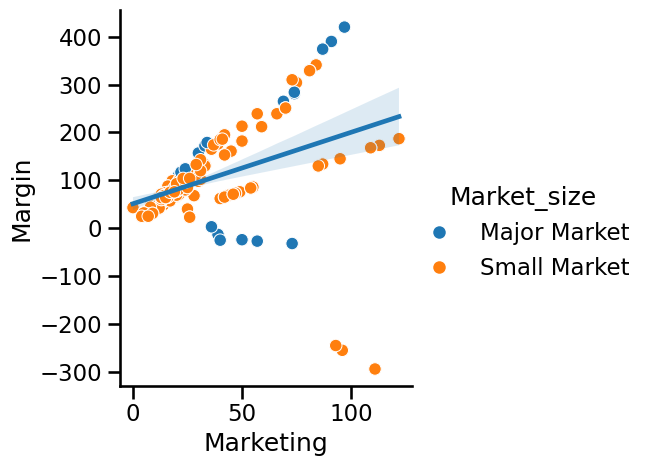

In [99]:
scatter_plot = sns.relplot(x = df[df['Market'] == 'West']['Marketing'], y = df[df['Market'] == 'West']['Margin'], kind = 'scatter', hue = df[df['Market'] == 'West']['Market_size'])
sns.regplot(x = df[df['Market'] == 'West']['Marketing'], y = df[df['Market'] == 'West']['Margin'], data = df, scatter=False, ax=scatter_plot.ax)

## Histograms

### Histogram of Margin

<Axes: xlabel='Margin', ylabel='Count'>

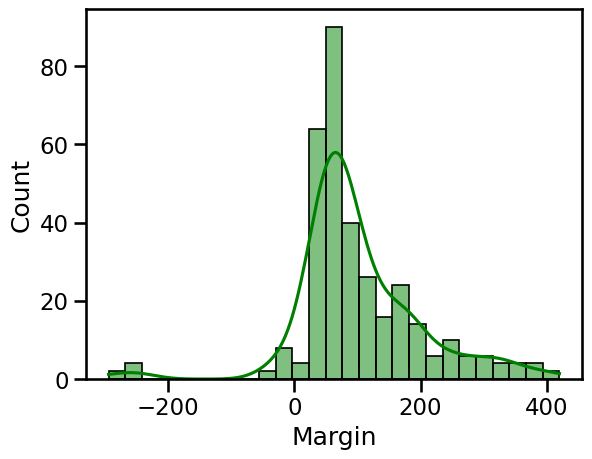

In [100]:
sns.histplot(df[df['Market'] == 'West']['Margin'], bins='auto', kde=True, color='green', edgecolor='black')

### Histogram of Marketing

<Axes: xlabel='Marketing', ylabel='Count'>

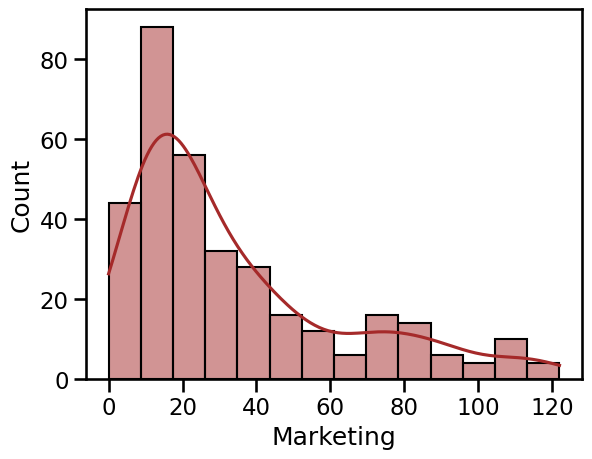

In [101]:
sns.histplot(df[df['Market'] == 'West']['Marketing'], bins='auto', kde=True, color='brown', edgecolor='black')

### Histogram of COGS

<Axes: xlabel='Cogs', ylabel='Count'>

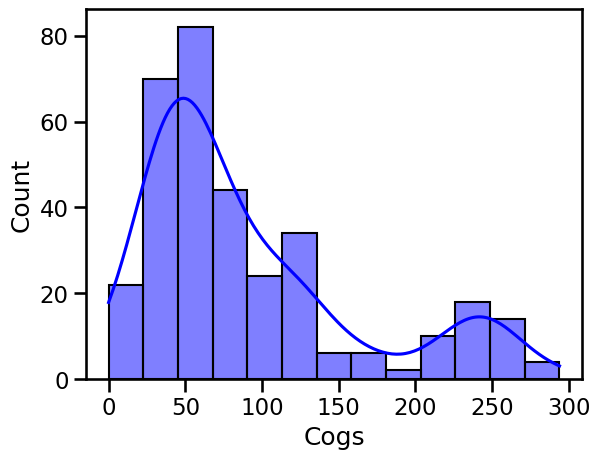

In [102]:
sns.histplot(df[df['Market'] == 'West']['Cogs'], bins='auto', kde=True, color='blue', edgecolor='black')

## Barplots

### Barplot of Market Size

<Axes: xlabel='Market_size', ylabel='count'>

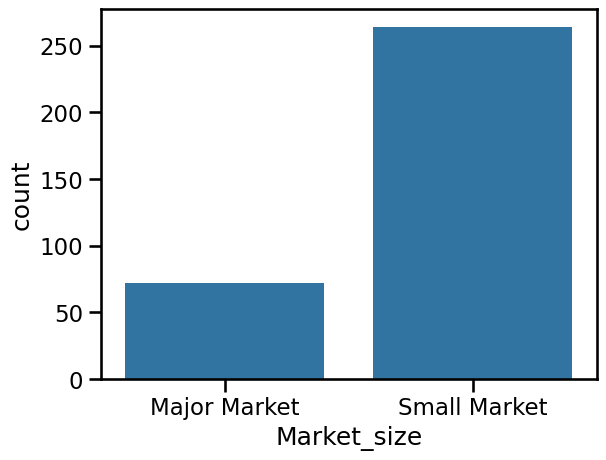

In [103]:
sns.countplot(x = df[df['Market'] == 'West']['Market_size'])

### Barplot of Product Line




<ipython-input-61-c330b28ac036>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[df['Market'] == 'West']['Product_line'], palette = 'pastel')


<Axes: xlabel='Product_line', ylabel='count'>

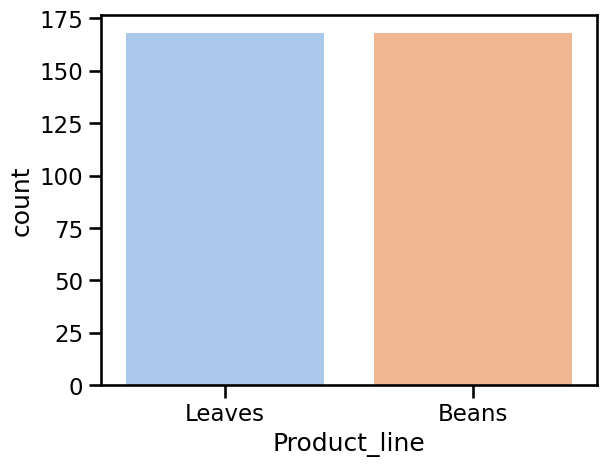

In [61]:
sns.countplot(x = df[df['Market'] == 'West']['Product_line'], palette = 'pastel')

## Histograms of Margin between Major and Small

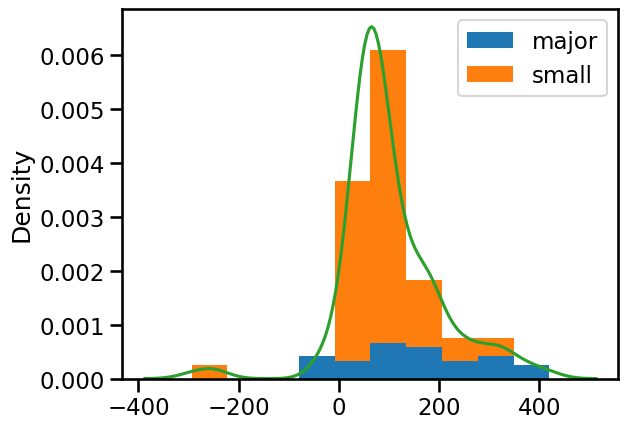

In [62]:
west_marjor = west[west['Market_size'] == 'Major Market']
west_small = west[west['Market_size'] == 'Small Market']
plt.figure()
plt.hist([west_marjor['Margin'], west_small['Margin']], histtype='barstacked', density=True,label=['major','small']);
#plt.hist([v1, v2], histtype='barstacked');
v3 = np.concatenate((west_marjor['Margin'], west_small['Margin']))
sns.kdeplot(v3);
plt.legend();

## Maketing Cost vs Margin by market size with regression line


<Figure size 1000x600 with 0 Axes>

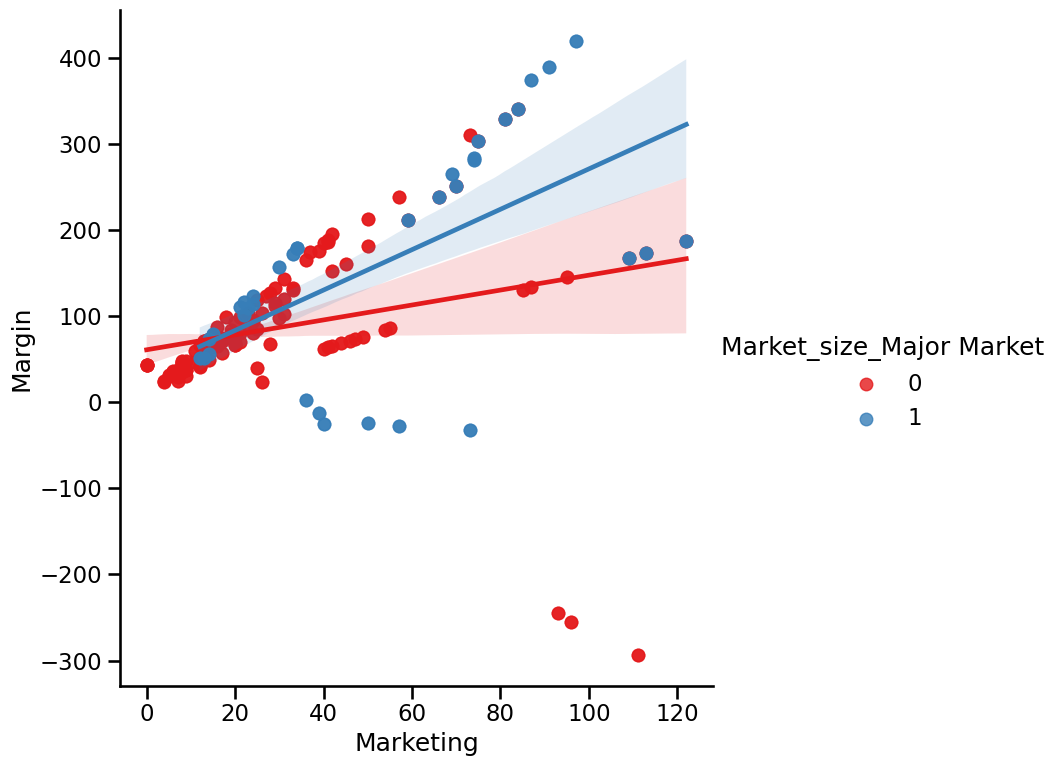

In [63]:
plt.figure(figsize=(10, 6))
sns.lmplot(x="Marketing", y="Margin", hue="Market_size_Major Market", data=west_plus_all, palette="Set1", height=8)
plt.show()

# 8. Conclustion
* The margin of westcoast coffee shops is affected mainly by Marketing cost and Market size
* The slope of the regression model of large market and that of small market are different (due to the effect of interaction term).

#9. The limitation of this model

1. The availability of the data​
 * This dataset only covers from 2012 to 2015. For futher analysis, we should get the latest data (but we couldn't).
<br>
2. Heteroscedasticity​
 * The distribution of dataset has heteroscedasticity, so we should revise the multivariate regression model to handle with heteroscedasticity.
<br>
3. Lack of marketing detail (ex: types of marketing)​
 * This dataset does not include marketing detail, so we could not investigate how marketing strategy affects coffee shops' margin.
<br>
4. Most of the samples were from the small market​
 * The main data are from coffee shops in small markets, so ｔhere may be some bias in the dataset about big markets' shops.
<br>
5. Possibility of other potential models: Quadratic, Log, etc